In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the single csv file to a variable named 'placement'
placement=pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [ ]:
placement_copy=placement.copy()
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


<Axes: >

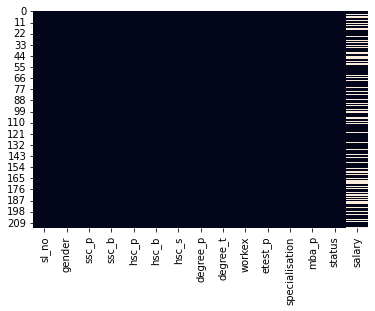

In [ ]:
sns.heatmap(placement_copy.isnull(),cbar=False)

# **Data Cleaning**

In [ ]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


Text(0.5, 1.0, 'Employability percentage')

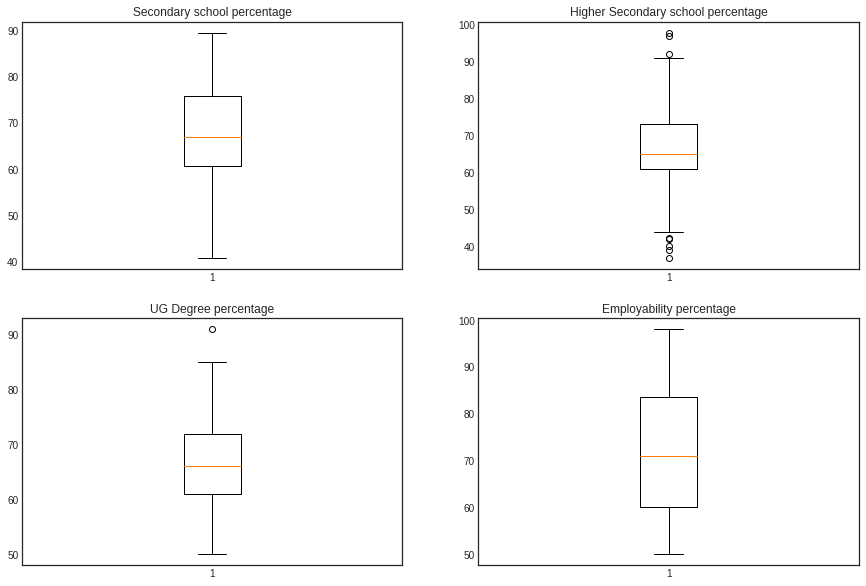

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability percentage')

In [ ]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_copy.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

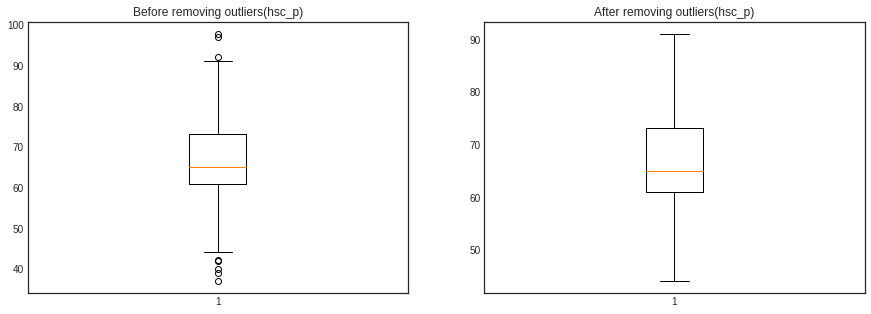

In [ ]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

# **Data Visualizations**


In [ ]:
x = placement_copy.drop(["status","salary"], axis=1)
y = placement_copy["status"]


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.3, random_state = 360)

train = x_train.join(y_train).copy()
test = x_test.join(y_test).copy()


In [ ]:
from pandas.api.types import is_string_dtype

        
def pivot_satisfaction (train, variable): 
    
    #All = data.shape[0]
    
    df_pivot = train.pivot_table(index= variable, columns="status", values="sl_no", aggfunc="count")
    
    df_pivot["total"] = df_pivot["Not Placed"]+df_pivot["Placed"]
    df_pivot["Placement_rate (%)"] = df_pivot["Placed"]/df_pivot["total"]*100
    
    df_pivot = df_pivot.style.background_gradient(axis=0, subset=['Placement_rate (%)'])
    
    return df_pivot       
        
def graph (data, variable, title):
    plt.figure(figsize = (10,4))
    if is_string_dtype(data[variable]) ==True:
        sns.countplot(data = data, y = variable, hue ="status", palette = "pastel" )
        sns.despine(top = True, right = True, left = False, bottom = False)
        plt.title(f"Popularity of {title}")
    else:
        sns.histplot(data= data, x = variable, hue ="status" ,palette = "pastel")
        sns.despine(top = True, right = True, left = False, bottom = False)
        plt.title(f"Distribution of {title}")
        
        


# **Distribution of placements**

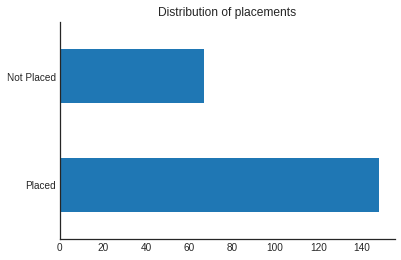

In [ ]:
placement_copy['status'].value_counts().plot(kind = "barh")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of placements")

plt.show()

# **Gender and placement**

In [ ]:
pivot_satisfaction (train, "gender")

status,Not Placed,Placed,total,Placement_rate (%)
gender,,,,
F,21,29,50,58.000000
M,28,72,100,72.000000


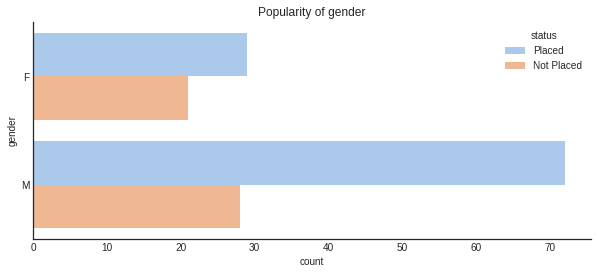

In [ ]:
graph (train, "gender", "gender")

# **Distribution Salary- Placed Students**

In [ ]:
placement_placed = placement_filtered[placement_filtered.salary != 0]

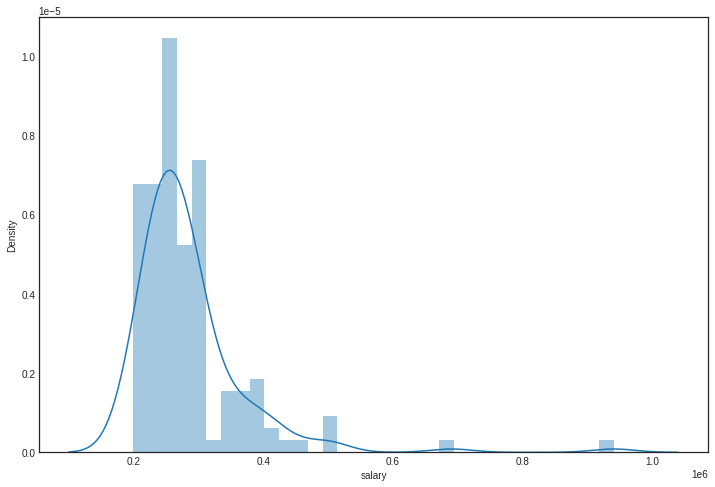

In [ ]:
plt.figure(figsize = (12,8))
plt.style.use('seaborn-white')
sns.distplot(placement_placed['salary'])
plt.show()

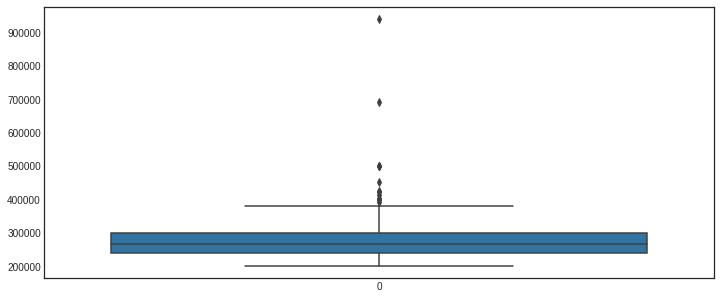

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(placement_placed["salary"])
plt.show()

 


# **Secondary Education percentage-10th Grade/Higher Secondary education percentage**

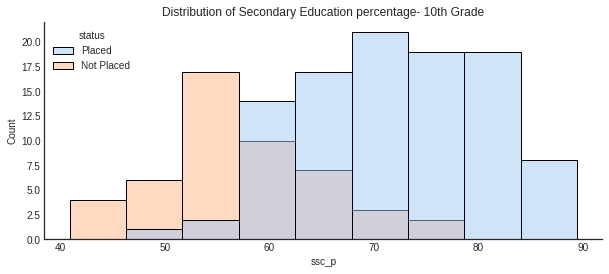

In [ ]:
graph (train, "ssc_p", "Secondary Education percentage- 10th Grade")

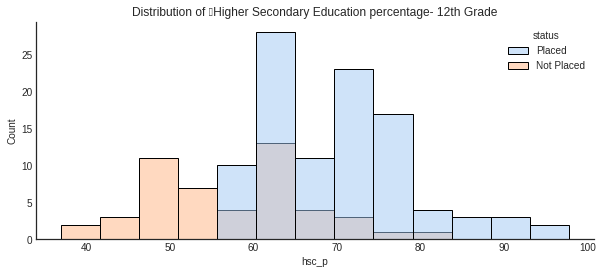

In [ ]:
graph (train, "hsc_p", "​Higher Secondary Education percentage- 12th Grade")

# **Distribution of all percentages**

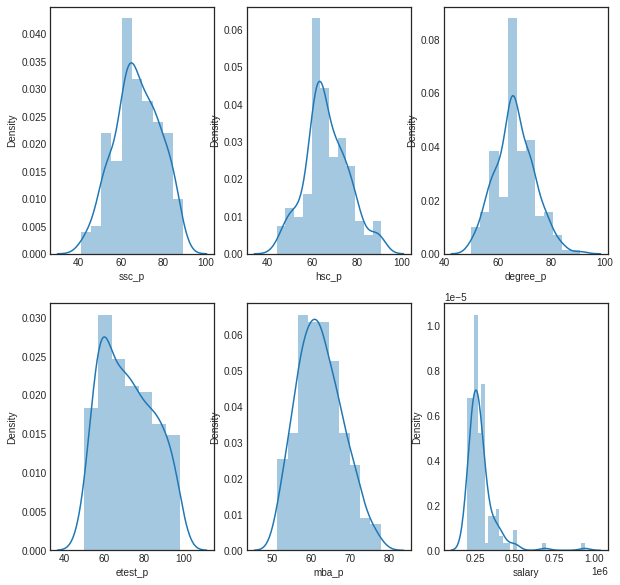

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(placement_filtered['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(placement_filtered['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(placement_filtered['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(placement_filtered['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(placement_filtered['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(placement_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

# **Board of Education- Central/ Others**



> Secondary Education Exam board (10th Grade)



In [ ]:
pivot_satisfaction (train, "ssc_b",)

status,Not Placed,Placed,total,Placement_rate (%)
ssc_b,,,,
Central,29,53,82,64.634146
Others,20,48,68,70.588235


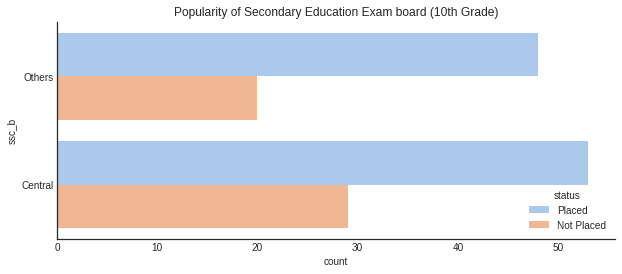

In [ ]:
graph (train, "ssc_b",  "Secondary Education Exam board (10th Grade)")



> Secondary Education Exam board (12th Grade)



In [ ]:
pivot_satisfaction (train, "hsc_b")

status,Not Placed,Placed,total,Placement_rate (%)
hsc_b,,,,
Central,23,39,62,62.903226
Others,26,62,88,70.454545


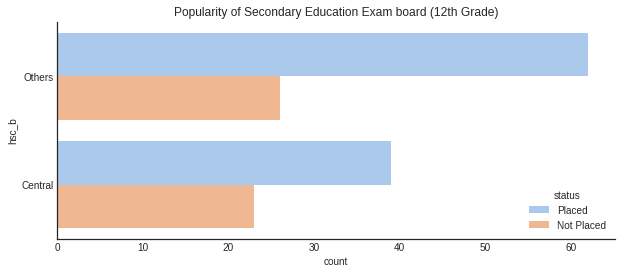

In [ ]:
graph (train, "hsc_b", "Secondary Education Exam board (12th Grade)")

# **Specialization in Higher Secondary Education**

In [ ]:
pivot_satisfaction (train, "hsc_s")

status,Not Placed,Placed,total,Placement_rate (%)
hsc_s,,,,
Arts,4,2,6,33.333333
Commerce,25,54,79,68.354430
Science,20,45,65,69.230769


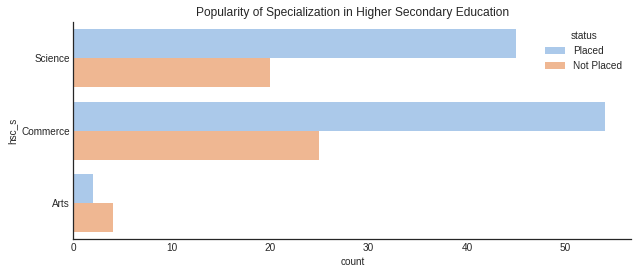

In [ ]:
graph (train, "hsc_s", "Specialization in Higher Secondary Education")

# **Degree Percentage**

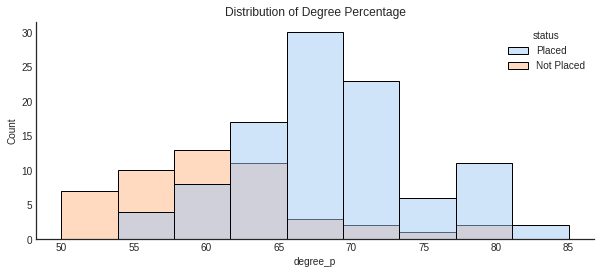

In [ ]:
graph (train, "degree_p", "Degree Percentage")

# **Under Graduation(Degree type)- Field of degree education**

In [ ]:
pivot_satisfaction (train, "degree_t")

status,Not Placed,Placed,total,Placement_rate (%)
degree_t,,,,
Comm&Mgmt,28,68,96,70.833333
Others,6,4,10,40.000000
Sci&Tech,15,29,44,65.909091


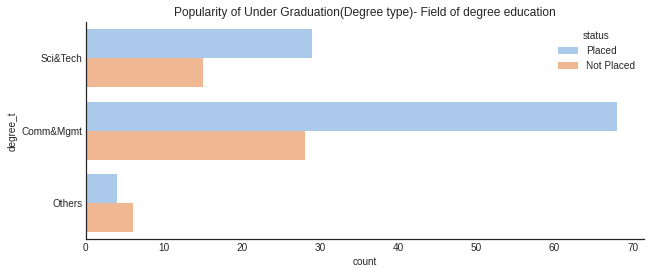

In [ ]:
graph (train, "degree_t", "Under Graduation(Degree type)- Field of degree education")

# **Work Experience**

In [ ]:
pivot_satisfaction (train, "workex")

status,Not Placed,Placed,total,Placement_rate (%)
workex,,,,
No,42,53,95,55.789474
Yes,7,48,55,87.272727


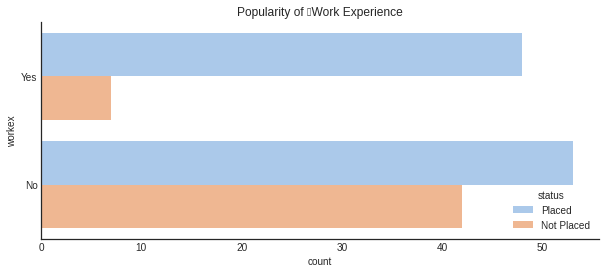

In [ ]:

graph (train, "workex", "​Work Experience")

# **Work experience Vs Placement Status**

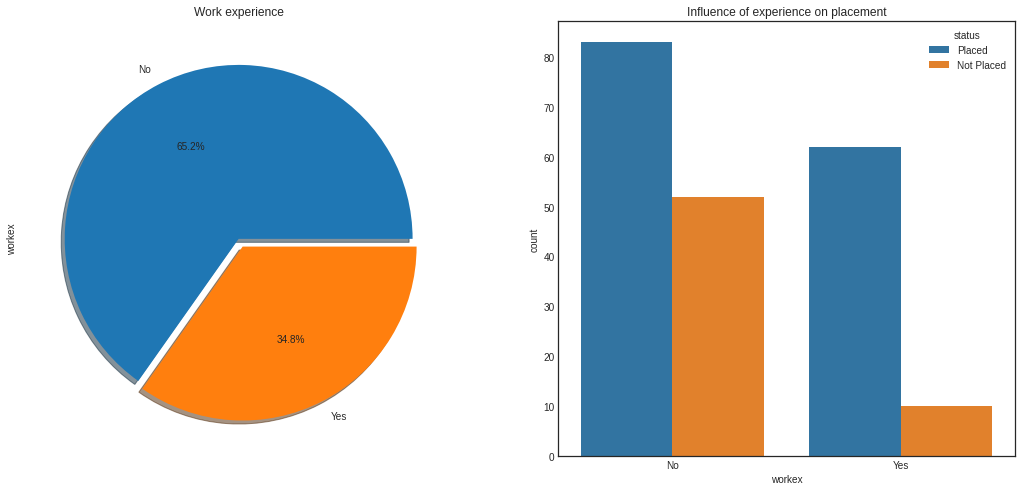

In [ ]:
#Code forked from-https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

# **Employability test percentage ( conducted by college) /MBA percentage**

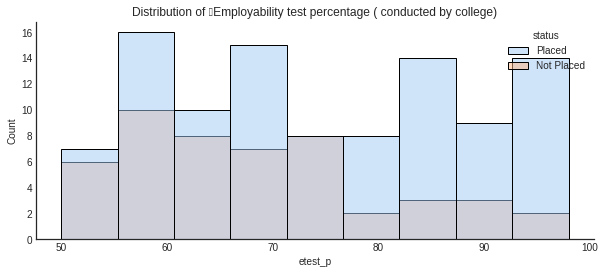

In [ ]:
graph (train, "etest_p", "​Employability test percentage ( conducted by college)")

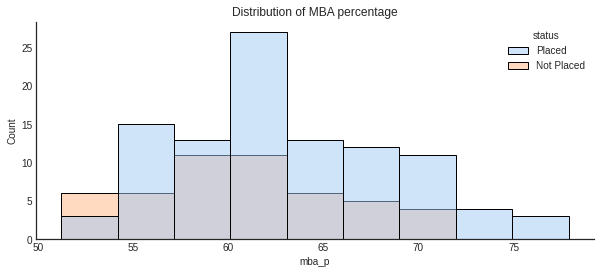

In [ ]:
graph (train, "mba_p", "MBA percentage")

# **Post Graduation(MBA)- Specialization**

In [ ]:
pivot_satisfaction (train, "specialisation")

status,Not Placed,Placed,total,Placement_rate (%)
specialisation,,,,
Mkt&Fin,19,64,83,77.108434
Mkt&HR,30,37,67,55.223881


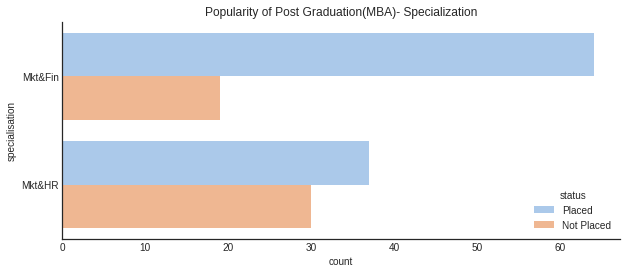

In [ ]:
graph (train, "specialisation", "Post Graduation(MBA)- Specialization")

# **MBA marks vs Placement Status-**

**Does your academic score influence?**

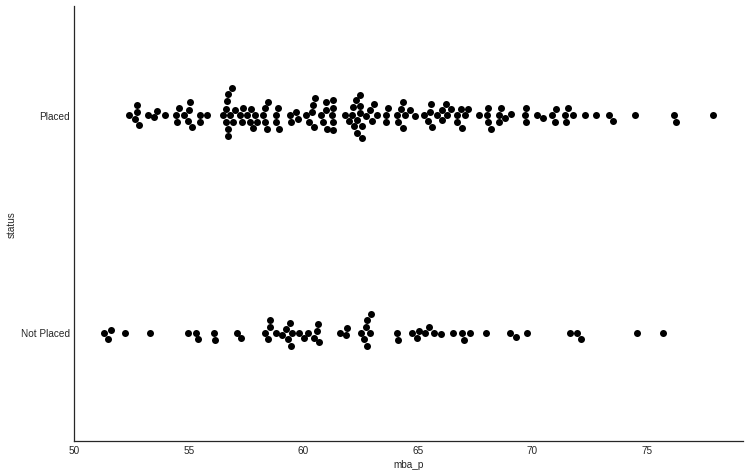

In [ ]:
g = sns.swarmplot(y = "status",x = 'mba_p',data = placement_filtered, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

In [ ]:
!pip install plotly_express==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Does MBA percentage and Employability score correlate?**

In [ ]:
import plotly_express as px
gapminder=px.data.gapminder()
px.scatter(placement_filtered,x="mba_p",y="etest_p",color="status",facet_col="workex")

# **Is there any gender bias while offering remuneration?**

In [ ]:
px.violin(placement_placed,y="salary",x="specialisation",color="gender",box=True,points="all")

# **Coorelation between academic percentages**

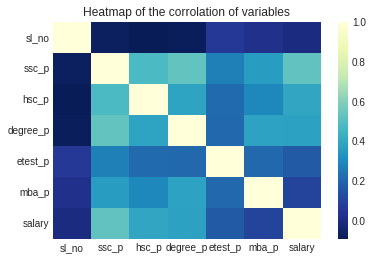

In [ ]:
from scipy.stats import chisquare

sns.heatmap(placement_filtered.corr(),cmap="YlGnBu_r")
plt.title("Heatmap of the corrolation of variables")
plt.show()

# **Distribution of our data**

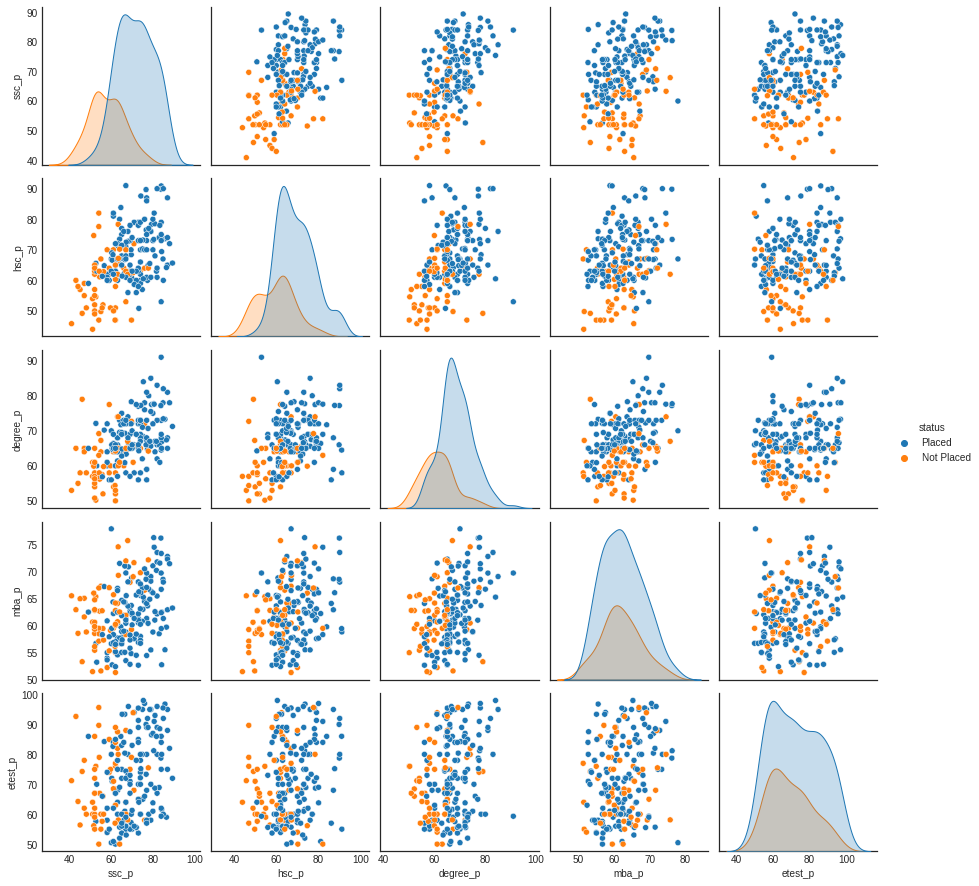

In [ ]:
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")